# Gujarat Assembly Election data Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, iplot, init_notebook_mode
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv("Final_df.csv")

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
Columns = [ col for col in df.columns]

# Types of Columns available in the Dataset

 Data is merged from Ashoka University and mynetainfo portal,
 below are the different type of features inside the dataset

In [5]:
Columns

['Election_Type',
 'State_Name',
 'Assembly_No',
 'ac_no',
 'Year',
 'month',
 'Poll_No',
 'DelimID',
 'Position',
 'Candidate',
 'Sex',
 'Party',
 'Votes',
 'Candidate_Type',
 'Valid_Votes',
 'Electors',
 'Constituency_Name',
 'Constituency_Type',
 'Sub_Region',
 'N_Cand',
 'Turnout_Percentage',
 'Vote_Share_Percentage',
 'Deposit_Lost',
 'Margin',
 'Margin_Percentage',
 'ENOP',
 'pid',
 'Party_Type_TCPD',
 'Party_ID',
 'last_poll',
 'Contested',
 'Last_Party',
 'Last_Party_ID',
 'Last_Constituency_Name',
 'Same_Constituency',
 'Same_Party',
 'No_Terms',
 'Turncoat',
 'Incumbent',
 'Recontest',
 'Age',
 'District_Name',
 'PC_Name',
 'PC_No',
 'CandID',
 'MyNeta_education',
 'TCPD_Prof_Main',
 'TCPD_Prof_Main_Desc',
 'TCPD_Prof_Second',
 'TCPD_Prof_Second_Desc',
 'ac_name',
 'dist_name',
 'dt_code',
 'pc_id',
 'pc_name',
 'pc_no',
 'st_code',
 'st_name',
 'winner']

# Total number of Electors over the Years

In [6]:
pd.set_option('display.max_columns', None)
df.head(1)

,Election_Type,State_Name,Assembly_No,ac_no,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,ac_name,dist_name,dt_code,pc_id,pc_name,pc_no,st_code,st_name,winner
0,AE,Gujarat,11,1,2007,12,0,3,1,JAYANTILAL PARSOTTAM BHANUSHALI,M,BJP,39004,GEN,87912,137105,ABDASA,GEN,NaN,6,64.12,44.37,no,10019,11.4,3.03,AEGJ11473,NaN,1605,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,43.0,NaN,NaN,NaN,NaN,5th Pass,Other or Unspecified,NaN,NaN,NaN,Abdasa,KACHCHH,1,2401,KACHCHH (SC),1,24,GUJARAT,True


# Total Electors in 2007     36593090
# Total Electors in 2012     38214460
# Total Electors in 2017     43528519


In [7]:
total_electors_2007 = df[(df['Year']== 2007) & (df['Position'] == 1)]['Electors'].sum()
total_electors_2007

36593090

In [8]:
total_electors_2012 = df[(df['Year']== 2012) & (df['Position'] == 1)]['Electors'].sum()
total_electors_2012

38214460

In [9]:
total_electors_2017 = df[(df['Year']== 2017) & (df['Position'] == 1)]['Electors'].sum()
total_electors_2017

43528519

In [10]:
print("Total Number of Electors 2007 is {}".format(total_electors_2007) )
print("Total Number of Electors 2012 is {}".format(total_electors_2012) )
print("Total Number of Electors 2017 is {}".format(total_electors_2017) )

Total Number of Electors 2007 is 36593090
Total Number of Electors 2012 is 38214460
Total Number of Electors 2017 is 43528519


In [11]:
dict1 = {"2007":total_electors_2007, "2012":total_electors_2012, "2017":total_electors_2017}
df_total_votes=pd.DataFrame(dict1.items(), columns=['Year', 'Electors'])

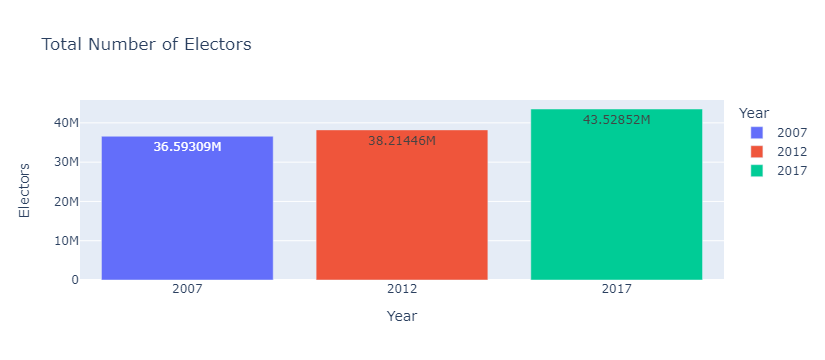

In [12]:
px.bar(x='Year', y='Electors', data_frame=df_total_votes, color='Year', title="Total Number of Electors", text_auto=True)

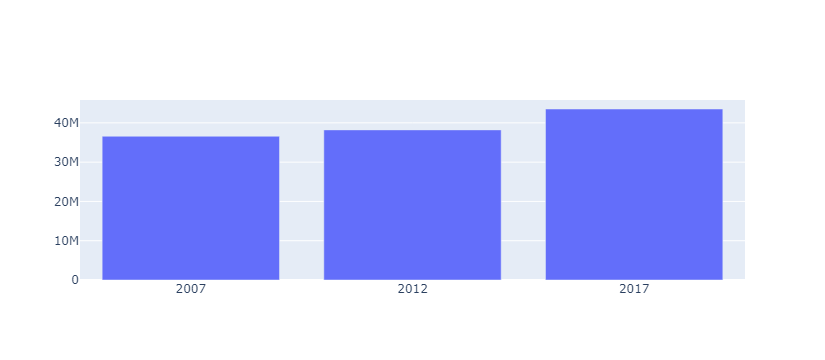

In [13]:
data = [go.Bar(
x = df_total_votes['Year'],
y = df_total_votes['Electors'],
name="Total Number of Electors"    
)]

fig = go.Figure(data=data)
fig.show()

# Total Turnout Percentage and Valid Votes 

In [14]:
valid_votes_2007 = df[(df['Year']== 2007) & (df['Position'] == 1)]['Valid_Votes'].sum()
valid_votes_2007

21485372

In [15]:
valid_votes_2012= df[(df['Year']== 2012) & (df['Position'] == 1)]['Valid_Votes'].sum()
valid_votes_2012

27542725

In [16]:
valid_votes_2017 =df[(df['Year']== 2017) & (df['Position'] == 1)]['Valid_Votes'].sum()
valid_votes_2017

30018086

In [17]:
turnout_2007 = valid_votes_2007/total_electors_2007*100

In [18]:
turnout_2007

58.71428731490016

In [19]:
turnout_2012 = valid_votes_2012/total_electors_2012*100
turnout_2012

72.07409184900166

In [20]:
turnout_2017 = valid_votes_2017/total_electors_2017*100
turnout_2017

68.96188220876525

In [21]:
turnout_2007 = round(turnout_2007,2)
turnout_2012 = round(turnout_2012,2)
turnout_2017 = round(turnout_2017,2)

In [22]:
print("The Valid votes in 2007 is {} and Turnout pecentage {}%".format(valid_votes_2007, turnout_2007))
print("The Valid votes in 2012 is {} and Turnout pecentage {}%".format(valid_votes_2012, turnout_2012))
print("The Valid votes in 2017 is {} and Turnout pecentage {}%".format(valid_votes_2017, turnout_2017))

The Valid votes in 2007 is 21485372 and Turnout pecentage 58.71%
The Valid votes in 2012 is 27542725 and Turnout pecentage 72.07%
The Valid votes in 2017 is 30018086 and Turnout pecentage 68.96%


In [23]:
dict = {"2007":valid_votes_2007, "2012":valid_votes_2012, "2017":valid_votes_2017}

In [24]:
df_valid_votes=pd.DataFrame(dict.items(), columns=['Year', 'Valid Votes'])

In [25]:
df_valid_votes

,Year,Valid Votes
0,2007,21485372
1,2012,27542725
2,2017,30018086


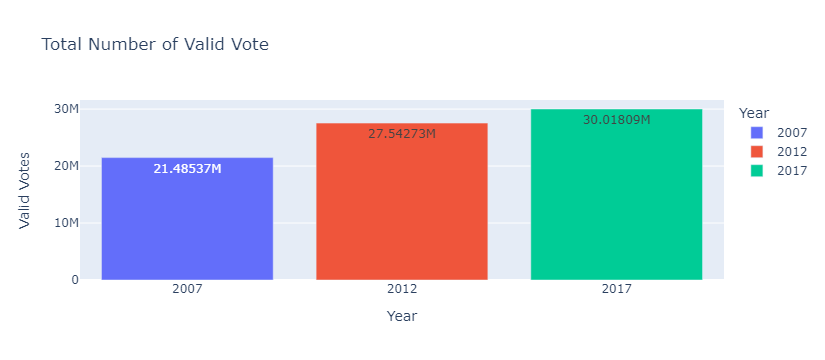

In [26]:
px.bar(x='Year', y='Valid Votes', data_frame=df_valid_votes, color='Year', title="Total Number of Valid Vote", text_auto=True)

In [27]:
turnout_2007

58.71

In [28]:
dict2 = {"2007":turnout_2007, "2012":turnout_2012, "2017":turnout_2017}
df_turnout=pd.DataFrame(dict2.items(), columns=['Year', 'Turnout'])

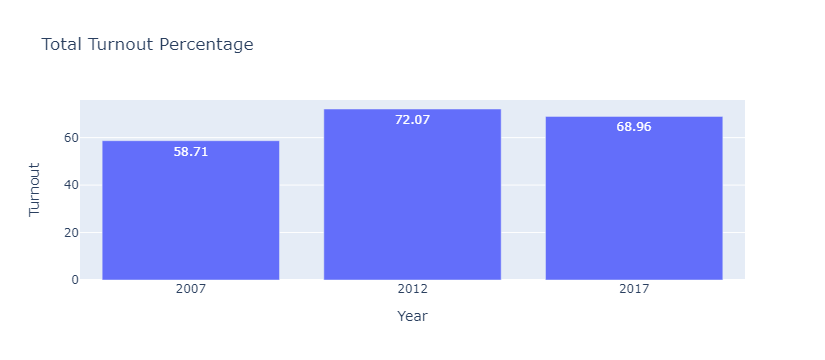

In [29]:
px.bar(x='Year', y='Turnout', data_frame=df_turnout,  title="Total Turnout Percentage", text_auto=True)

In [30]:
total_sc_electors_2007= df[(df['Year']== 2007) & (df['Position'] == 1) & (df['Constituency_Type'] =='SC')]['Electors'].sum()
total_sc_electors_2012= df[(df['Year']== 2012) & (df['Position'] == 1) & (df['Constituency_Type'] =='SC')]['Electors'].sum()
total_sc_electors_2017= df[(df['Year']== 2017) & (df['Position'] == 1) & (df['Constituency_Type'] =='SC')]['Electors'].sum()
total_st_electors_2007= df[(df['Year']== 2007) & (df['Position'] == 1) & (df['Constituency_Type'] =='ST')]['Electors'].sum()
total_st_electors_2012= df[(df['Year']== 2012) & (df['Position'] == 1) & (df['Constituency_Type'] =='ST')]['Electors'].sum()
total_st_electors_2017= df[(df['Year']== 2017) & (df['Position'] == 1) & (df['Constituency_Type'] =='ST')]['Electors'].sum()
total_gen_electors_2007= df[(df['Year']== 2007) & (df['Position'] == 1) & (df['Constituency_Type'] =='GEN')]['Electors'].sum()
total_gen_electors_2012= df[(df['Year']== 2012) & (df['Position'] == 1) & (df['Constituency_Type'] =='GEN')]['Electors'].sum()
total_gen_electors_2017= df[(df['Year']== 2017) & (df['Position'] == 1) & (df['Constituency_Type'] =='GEN')]['Electors'].sum()

In [31]:
dict3 = {"2007":total_sc_electors_2007, "2012":total_sc_electors_2012, "2017":total_sc_electors_2017}
df_sc_electors = pd.DataFrame(dict3.items(), columns=['Year', 'SC Electors'])
dict4 = {"2007":total_st_electors_2007, "2012":total_st_electors_2012, "2017":total_st_electors_2017}
df_st_electors = pd.DataFrame(dict4.items(), columns=['Year', 'ST Electors'])
dict5 = {"2007":total_gen_electors_2007, "2012":total_gen_electors_2012, "2017":total_gen_electors_2017}
df_gen_electors = pd.DataFrame(dict5.items(), columns=['Year', 'GEN Electors'])

In [32]:
df_sc_st_electors = pd.merge(df_sc_electors,df_st_electors, on='Year', how='left')

In [33]:
df_sc_st_electors

,Year,SC Electors,ST Electors
0,2007,2508376,5249775
1,2012,2767191,5469779
2,2017,3189515,6137394


In [34]:
df_cat_electors = pd.merge(df_sc_st_electors, df_gen_electors, on='Year', how='left')

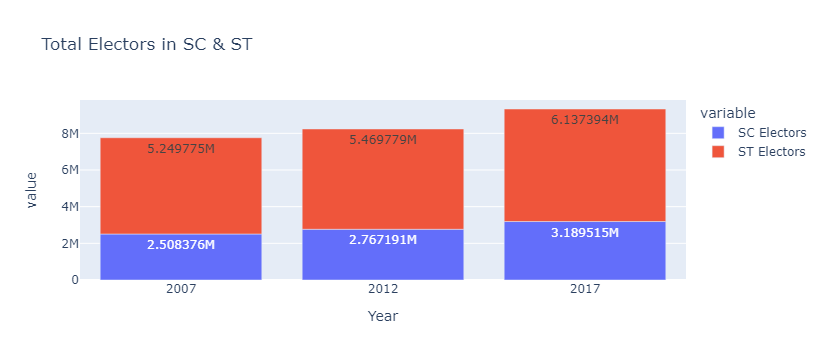

In [35]:
px.bar(x='Year', y=['SC Electors','ST Electors'], data_frame=df_cat_electors,  title="Total Electors in SC & ST", text_auto=True)

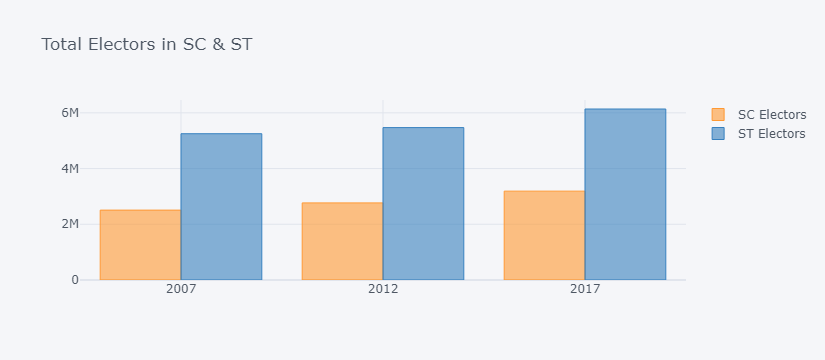

In [36]:
df_cat_electors.iplot(kind='bar', x='Year', y=['SC Electors', 'ST Electors'],  title="Total Electors in SC & ST" )

In [37]:
total_sc_valid_2007= df[(df['Year']== 2007) & (df['Position'] == 1) & (df['Constituency_Type'] =='SC')]['Valid_Votes'].sum()
total_sc_valid_2012= df[(df['Year']== 2012) & (df['Position'] == 1) & (df['Constituency_Type'] =='SC')]['Valid_Votes'].sum()
total_sc_valid_2017= df[(df['Year']== 2017) & (df['Position'] == 1) & (df['Constituency_Type'] =='SC')]['Valid_Votes'].sum()
total_st_valid_2007= df[(df['Year']== 2007) & (df['Position'] == 1) & (df['Constituency_Type'] =='ST')]['Valid_Votes'].sum()
total_st_valid_2012= df[(df['Year']== 2012) & (df['Position'] == 1) & (df['Constituency_Type'] =='ST')]['Valid_Votes'].sum()
total_st_valid_2017= df[(df['Year']== 2017) & (df['Position'] == 1) & (df['Constituency_Type'] =='ST')]['Valid_Votes'].sum()
total_gen_valid_2007= df[(df['Year']== 2007) & (df['Position'] == 1) & (df['Constituency_Type'] =='GEN')]['Valid_Votes'].sum()
total_gen_valid_2012= df[(df['Year']== 2012) & (df['Position'] == 1) & (df['Constituency_Type'] =='GEN')]['Valid_Votes'].sum()
total_gen_valid_2017= df[(df['Year']== 2017) & (df['Position'] == 1) & (df['Constituency_Type'] =='GEN')]['Valid_Votes'].sum()

In [38]:
dict6 = {"2007":total_sc_valid_2007, "2012":total_sc_valid_2012, "2017":total_sc_valid_2017}
dict7 = {"2007":total_st_valid_2007, "2012":total_st_valid_2012, "2017":total_st_valid_2017}
dict8 = {"2007":total_gen_valid_2007, "2012":total_gen_valid_2012, "2017":total_gen_valid_2017}
df_valid_sc = pd.DataFrame(dict6.items(), columns=['Year', 'SC Valid_Votes'])
df_valid_st = pd.DataFrame(dict7.items(), columns=['Year', 'ST Valid_Votes'])
df_valid_gen = pd.DataFrame(dict8.items(), columns=['Year', 'GEN Valid_Votes'])

In [39]:
df_cat_valid = pd.merge(df_valid_sc, df_valid_st, on='Year', how='left')

In [40]:
df_cat_valid = df_cat_valid.merge(df_gen_electors, on='Year', how='left')

In [41]:
df_cat_valid

,Year,SC Valid_Votes,ST Valid_Votes,GEN Electors
0,2007,1397382,3078575,28834939
1,2012,1933466,4097792,29977490
2,2017,2120158,4477204,34201610


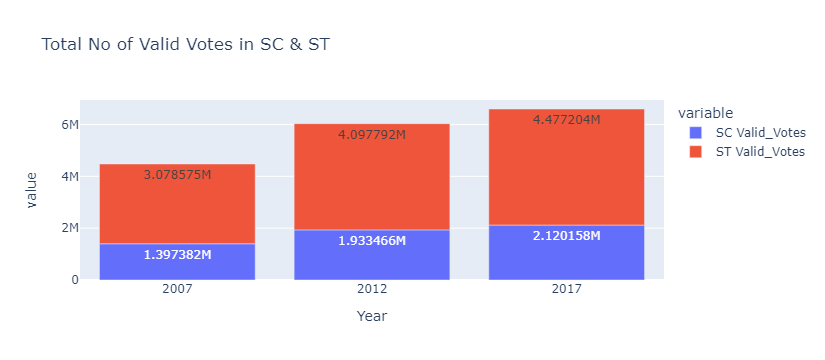

In [42]:
px.bar(x='Year', y=['SC Valid_Votes','ST Valid_Votes'], data_frame=df_cat_valid,  title="Total No of Valid Votes in SC & ST", text_auto=True)

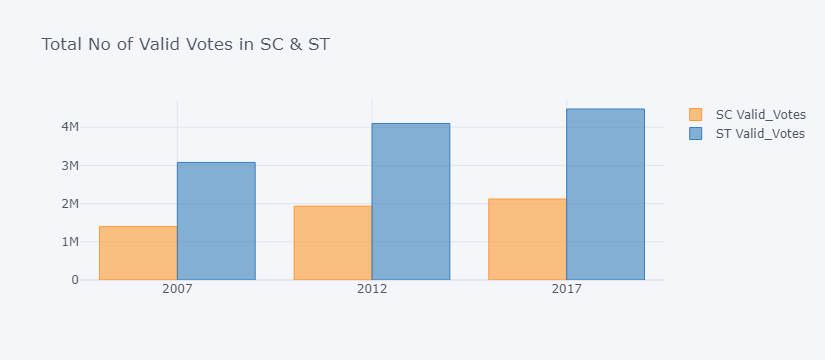

In [43]:
df_cat_valid.iplot(kind='bar', x='Year', y=['SC Valid_Votes',  'ST Valid_Votes'], title='Total No of Valid Votes in SC & ST')

In [44]:
sc_turnout_2007= total_sc_valid_2007/total_sc_electors_2007*100
sc_turnout_2012= total_sc_valid_2012/total_sc_electors_2012*100
sc_turnout_2017= total_sc_valid_2017/total_sc_electors_2017*100
st_turnout_2007= total_st_valid_2007/total_st_electors_2007*100
st_turnout_2012= total_st_valid_2012/total_st_electors_2012*100
st_turnout_2017= total_st_valid_2017/total_st_electors_2017*100
gen_turnout_2007= total_gen_valid_2007/total_gen_electors_2007*100
gen_turnout_2012= total_gen_valid_2012/total_gen_electors_2012*100
gen_turnout_2017= total_gen_valid_2017/total_gen_electors_2017*100

In [45]:
dict9={'2007':sc_turnout_2007, '2012':sc_turnout_2012, '2017':sc_turnout_2017}
dict10={'2007':st_turnout_2007, '2012':st_turnout_2012, '2017':st_turnout_2017}
dict11={'2007':gen_turnout_2007, '2012':gen_turnout_2012, '2017':gen_turnout_2017}
df_turnout_sc = pd.DataFrame(dict9.items(), columns=['Year', 'SC Turnout Percentage'])
df_turnout_st = pd.DataFrame(dict10.items(), columns=['Year', 'ST Turnout Percentage'])
df_turnout_gen = pd.DataFrame(dict11.items(), columns=['Year', 'GEN Turnout Percentage'])

In [46]:
df_cat_turnout = pd.merge(df_turnout_sc, df_turnout_st, on='Year', how='left')
df_cat_turnout = df_cat_turnout.merge(df_turnout_gen, on='Year', how='left')

In [47]:
df_cat_turnout

,Year,SC Turnout Percentage,ST Turnout Percentage,GEN Turnout Percentage
0,2007,55.708634,58.642037,58.988906
1,2012,69.871071,74.916957,71.758733
2,2017,66.472740,72.949594,68.478425


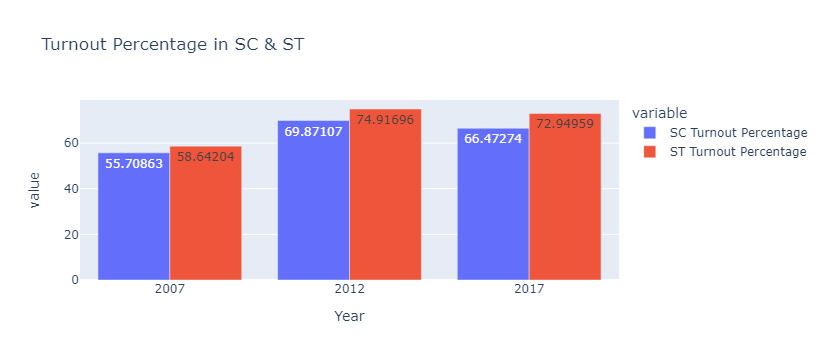

In [48]:
fig =px.bar(x='Year', y=['SC Turnout Percentage','ST Turnout Percentage'], data_frame=df_cat_turnout,  title="Turnout Percentage in SC & ST", text_auto=True, barmode='group')
fig.show()

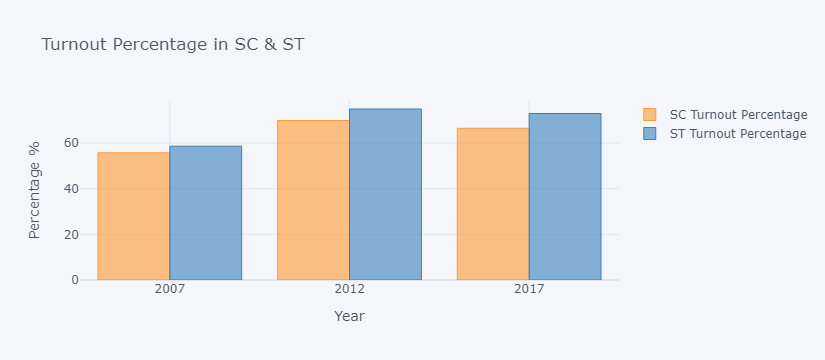

In [49]:
df_cat_turnout.iplot(kind='bar', x='Year', y=['SC Turnout Percentage', 'ST Turnout Percentage'], yTitle='Percentage %', xTitle='Year', title='Turnout Percentage in SC & ST')